In [70]:
import fiona
import geopandas as gpd
import numpy as np

In [201]:
phils = gpd.read_file("OSM/ph_final_distances.shp")
phils.crs = {'proj': 'latlong', 'ellps': 'WGS84', 'datum': 'WGS84', 'no_defs': True}
print(phils.crs)

{'proj': 'latlong', 'ellps': 'WGS84', 'datum': 'WGS84', 'no_defs': True}


In [207]:
len(phils)

41933

In [202]:
phils['REGION'].unique()

array(['Cordillera Administrative Region (CAR)', 'Caraga (Region XIII)',
       'Western Visayas (Region VI)', 'Bicol Region (Region V)',
       'Autonomous Region of Muslim Mindanao (ARMM)',
       'Northern Mindanao (Region X)', 'Central Visayas (Region VII)',
       'Cagayan Valley (Region II)', 'Central Luzon (Region III)',
       'CALABARZON (Region IV-A)', 'Eastern Visayas (Region VIII)',
       'Davao Region (Region XI)', 'Ilocos Region (Region I)',
       'Metropolitan Manila', 'MIMAROPA (Region IV-B)',
       'SOCCSKSARGEN (Region XII)', 'Zamboanga Peninsula (Region IX)'],
      dtype=object)

In [203]:
regions = ['Regions']
regions = np.append(regions, phils['REGION'].unique())
np.savetxt('Philippine Subsets/AARegions.csv', regions, delimiter=',',fmt='%s')

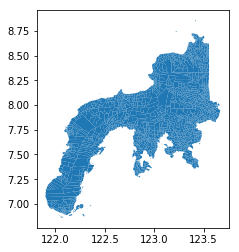

In [204]:
phils[phils['REGION'] == "Zamboanga Peninsula (Region IX)"].plot()
#[phils['NAME_3'] == 'Commonwealth']

In [180]:
def shp(city_name, file_name, barangay):
    #phils = gpd.read_file("Shapefiles/Barangays.shp")
    #phils = gpd.read_file("metro_manila_philgis/Metropolitan Manila.shp")
    if barangay == 0:
        phils[phils.REGION == city_name].to_file('Philippine Subsets/'+file_name+'.shp')#, schema = input_schema)
        #phils[phils.NAME_1 == city_name].plot(figsize = [6,6])
    else:
        city = phils[phils.NAME_2 == city_name]
        city[city.NAME_3 == barangay].plot(figsize = [6,6])
        city[city.NAME_3 == barangay].to_file('GeoJSONs/'+file_name+'.json', driver = 'GeoJSON')
    #print(len(phils[phils.NAME_2 == city_name]))

In [195]:
file_names = ["CAR", "13", "6", "5", "ARMM", "10", "7", "2", "3", "4A", "8", "11","1", "NCR", "4B", "12", "9"]

In [205]:
counter = 0
for i in phils['REGION'].unique():
    j = file_names[counter]
    print(i,j)
    shp(i, "Region "+j, 0)
    counter+=1

Cordillera Administrative Region (CAR) CAR
Caraga (Region XIII) 13
Western Visayas (Region VI) 6
Bicol Region (Region V) 5
Autonomous Region of Muslim Mindanao (ARMM) ARMM
Northern Mindanao (Region X) 10
Central Visayas (Region VII) 7
Cagayan Valley (Region II) 2
Central Luzon (Region III) 3
CALABARZON (Region IV-A) 4A
Eastern Visayas (Region VIII) 8
Davao Region (Region XI) 11
Ilocos Region (Region I)  1
Metropolitan Manila NCR
MIMAROPA (Region IV-B) 4B
SOCCSKSARGEN (Region XII) 12
Zamboanga Peninsula (Region IX) 9


In [7]:
phils = gpd.read_file("Shapefiles/Barangays.shp")
#phils[phils['NAME_2'] == "San Fernando City" & phils['PROVINCE'] == "La Union"].plot(figsize = [6,6])

In [61]:
# phils = phils[(phils["REGION"] == "Metropolitan Manila")].reset_index()
# phils[phils.NAME_3 == "Barangay 154"] <- Nonexistent in MCD12Q1

In [170]:
phils.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,ID_3,NAME_3,NL_NAME_3,VARNAME_3,TYPE_3,ENGTYPE_3,PROVINCE,REGION,geometry
0,177,PHL,Philippines,1,Abra,16,Manabo,172,San Jose Norte,None,None,Barangay,Village,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.7004318237306 17.45648002624512,..."
1,177,PHL,Philippines,1,Abra,16,Manabo,173,San Jose Sur,None,None,Barangay,Village,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.7478332519531 17.44495964050304,..."
2,177,PHL,Philippines,1,Abra,16,Manabo,174,San Juan Norte,None,None,Barangay,Village,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.697883605957 17.4354190826416, 1..."
3,177,PHL,Philippines,1,Abra,16,Manabo,175,San Juan Sur,None,None,Barangay,Village,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.6651611328126 17.42831993103033,..."
4,177,PHL,Philippines,1,Abra,16,Manabo,176,San Ramon East,None,None,Barangay,Village,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.7056732177734 17.42276954650873,..."


In [184]:
phils_ncr = phils[(phils["REGION"] == "Metropolitan Manila") & (phils["NAME_2"] != "Manila") & (phils['ID_3'] != 24203)]
len(phils_ncr)

793

In [189]:
phils_qc = phils[phils["NAME_2"] == "Quezon City"]

In [190]:
phils_qc.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,ID_3,NAME_3,NL_NAME_3,VARNAME_3,TYPE_3,ENGTYPE_3,PROVINCE,REGION,geometry
25695,177,PHL,Philippines,47,Metropolitan Manila,963,Quezon City,25622,Alicia,None,None,Barangay,Village,Metropolitan Manila,Metropolitan Manila,"POLYGON ((121.0198669433594 14.66056060791016,..."
25696,177,PHL,Philippines,47,Metropolitan Manila,963,Quezon City,25623,Amihan,None,None,Barangay,Village,Metropolitan Manila,Metropolitan Manila,"POLYGON ((121.0676422119142 14.63267040252697,..."
25697,177,PHL,Philippines,47,Metropolitan Manila,963,Quezon City,25624,Apolonio Samson,None,None,Barangay,Village,Metropolitan Manila,Metropolitan Manila,"POLYGON ((120.9975280761719 14.66039085388195,..."
25698,177,PHL,Philippines,47,Metropolitan Manila,963,Quezon City,25625,Aurora,None,None,Barangay,Village,Metropolitan Manila,Metropolitan Manila,"POLYGON ((121.0065307617188 14.61850070953381,..."
25699,177,PHL,Philippines,47,Metropolitan Manila,963,Quezon City,25626,Baesa,None,None,Barangay,Village,Metropolitan Manila,Metropolitan Manila,"POLYGON ((121.0186080932618 14.67836093902594,..."


In [64]:
phils_ncr.to_file("ncr_without_mnl")
phils_ncr["AREA"] = phils_ncr.area

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [65]:
!tar -cvf ncr_without_mnl.tar ncr_without_mnl

ncr_without_mnl/
ncr_without_mnl/ncr_without_mnl.shp
ncr_without_mnl/ncr_without_mnl.dbf
ncr_without_mnl/ncr_without_mnl.cpg
ncr_without_mnl/ncr_without_mnl.prj
ncr_without_mnl/ncr_without_mnl.shx


In [11]:
phils[phils.NAME_2 == "Quezon City" & phils.NAME_3 == "Commonwealth"]

TypeError: cannot compare a dtyped [object] array with a scalar of type [bool]